In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [0]:
cd gdrive

[Errno 2] No such file or directory: 'gdrive'
/content/gdrive/My Drive


In [0]:
ls -l

In [0]:
cd My Drive

[Errno 2] No such file or directory: 'My Drive'
/content/gdrive/My Drive


In [0]:
ls -l

In [0]:
cd Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [0]:
dataset = pd.read_csv('work.csv')
dataset.head(2)

,Unnamed: 0,Rating_before_contest,Rank_in_contest,Mean_below_ranked,Rating_change
0,0,2639,1,1952.895445,135
1,0,2570,2,1952.255959,136


In [0]:
dataset.describe(include='all')

,Unnamed: 0,Rating_before_contest,Rank_in_contest,Mean_below_ranked,Rating_change
count,967.0,967.000000,967.000000,967.000000,967.000000
mean,0.0,1953.604964,484.000000,1895.610967,7.555326
std,0.0,152.931313,279.293155,63.458690,81.574584
min,0.0,1800.000000,1.000000,0.000000,-162.000000
25%,0.0,1845.000000,242.500000,1885.631266,-49.000000
50%,0.0,1909.000000,484.000000,1890.983903,8.000000
75%,0.0,2008.500000,725.500000,1905.639784,65.000000
max,0.0,2739.000000,967.000000,1952.895445,184.000000


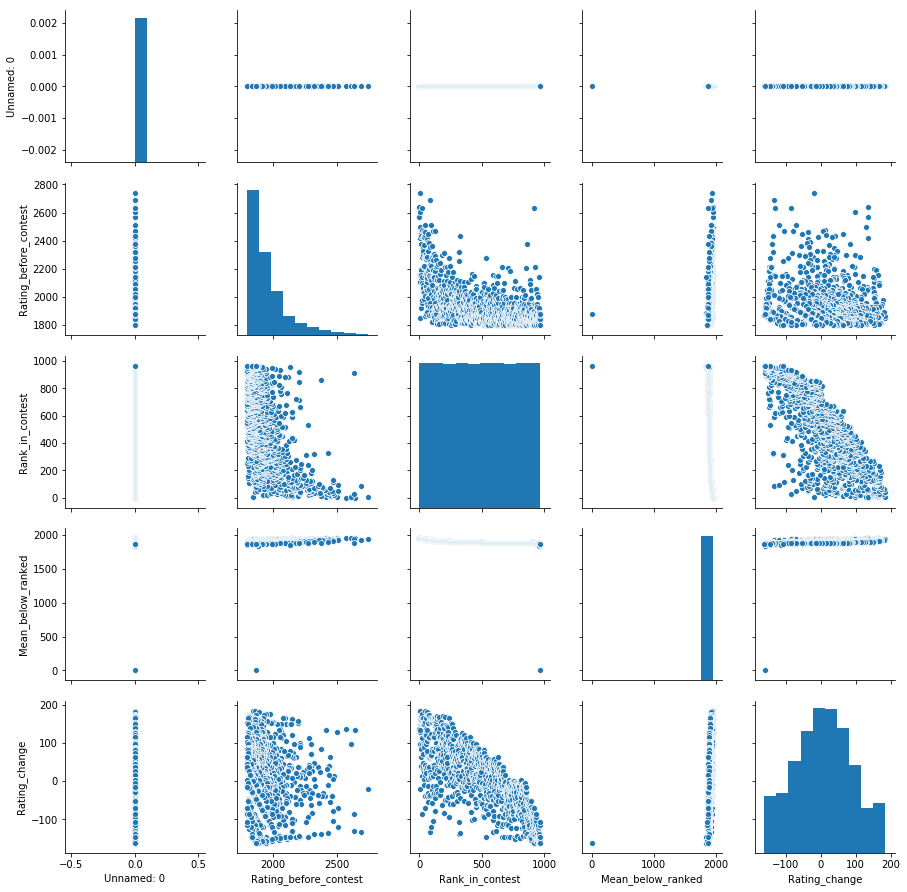

In [0]:
sns.pairplot(dataset)

In [0]:
X=dataset.iloc[:,1:4]
y=dataset.iloc[:,4].values.reshape(-1,1)
y

array([[ 135],
       [ 136],
       [  98],
       [ 130],
       [ 163],
       [ 134],
       [ 163],
       [ -21],
       [ 184],
       [ 151],
       [ 153],
       [ 151],
       [  62],
       [ 157],
       [  84],
       [ 163],
       [ 167],
       [  41],
       [ 155],
       [  98],
       [  13],
       [ 165],
       [ 113],
       [ 150],
       [ 177],
       [ -85],
       [ 150],
       [  31],
       [  71],
       [ 166],
       [  71],
       [  37],
       [  47],
       [ 149],
       [ 155],
       [  23],
       [  99],
       [   5],
       [ 151],
       [  96],
       [  -9],
       [  89],
       [  15],
       [  38],
       [  43],
       [ 183],
       [ 154],
       [ -38],
       [ -70],
       [ 120],
       [  27],
       [ 166],
       [ 131],
       [ 136],
       [  98],
       [  32],
       [  22],
       [ 121],
       [ -38],
       [ 105],
       [ 176],
       [ 133],
       [  75],
       [ 181],
       [  79],
       [  38],
       [ -

In [0]:

from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y=sc.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=3, input_dim=3))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

In [0]:
results=regressor.fit(X_train,y_train)

Epoch 1/100
676/676 [==============================] - 0s 481us/step - loss: 244937.5971 - mean_absolute_error: 465.4048 - acc: 0.0000e+00
Epoch 2/100
676/676 [==============================] - 0s 98us/step - loss: 132950.6088 - mean_absolute_error: 324.5549 - acc: 0.0000e+00
Epoch 3/100
676/676 [==============================] - 0s 98us/step - loss: 72051.4032 - mean_absolute_error: 226.5389 - acc: 0.0030
Epoch 4/100
676/676 [==============================] - 0s 96us/step - loss: 45200.0368 - mean_absolute_error: 174.7298 - acc: 0.0059
Epoch 5/100
676/676 [==============================] - 0s 98us/step - loss: 35133.5424 - mean_absolute_error: 155.3980 - acc: 0.0015
Epoch 6/100
676/676 [==============================] - 0s 98us/step - loss: 31786.9700 - mean_absolute_error: 147.5040 - acc: 0.0030
Epoch 7/100
676/676 [==============================] - 0s 102us/step - loss: 30487.5306 - mean_absolute_error: 143.8884 - acc: 0.0015
Epoch 8/100
676/676 [==============================] - 0s

In [0]:
y_pred= regressor.predict(X_test)

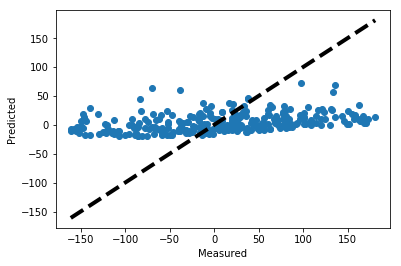

In [0]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()